<h1><font color="#113D68" size=5>Redes neuronales y deep learning</font></h1>



<h1><font color="#113D68" size=6>Actividad Semana 2</font></h1>


<br><br>
<div style="text-align: right">
<font size=3>Daniel González</font><br>
<font size=3>Semana 2: Frameworks de Deep Learning: TensorFlow</font><br>
<font size=3>IEBS</font>
</div>

---


In [ ]:
import tensorflow as tf
import numpy as np

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

En esta actividad vamos a seguir familiarizándonos con la herramienta *TensorFlow*, para ello vamos a utilizar un dataset donde tendréis que relizar todos los pasos (cargar datos, crear arquitectura de la red, etc.) vosotros mismos para prácticar con la sintásis de *TensorFlow*. Tendéis ejercicios obligatorio y un ejercicio opcional.

# <font color="#004D7F" size=5>Ejercicio</font>
Usando los datos visto en los ejercicios sobre casa y sus precios realiza los ejercicios que se indican.

La información de los datos podéis verla en este enlace:

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data

## <font color="#004D7F" size=4>Ejercicio 1</font>
Carga los datos como hemos visto en el notebook de los ejercicios donde tengas los conjuntos de train y test:

In [ ]:
# Completar Carga de datos
boston_housing = tf.keras.datasets.boston_housing
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()


Explora los tamaños de cada conjunto:

In [ ]:
# Completar Tamaño conjuntos
print(f"Tamaño de los datos de entrada del conjunto de entrenamiento: {x_train.shape}")
print(f"Tamaño de los datos de salida del conjunto de entrenamiento: {y_train.shape}")
print(f"Tamaño de los datos de entrada del conjunto de test: {x_test.shape}")
print(f"Tamaño de los datos de salida del conjunto de test: {y_test.shape}")
print(f"Ejemplo de valor de una casa en miles de $: {y_train[0]}")
print(f"Ejemplo de todas las variables del registro de una casa: {x_train[0]}")

Tamaño de los datos de entrada del conjunto de entrenamiento: (404, 13)
Tamaño de los datos de salida del conjunto de entrenamiento: (404,)
Tamaño de los datos de entrada del conjunto de test: (102, 13)
Tamaño de los datos de salida del conjunto de test: (102,)
Ejemplo de valor de una casa en miles de $: 15.2
Ejemplo de todas las variables del registro de una casa: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


## <font color="#004D7F" size=4>Ejercicio 2</font>
Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.
    - Tipo de entrenamiento:
        - *Epochs*: 100
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001
        - *Función de error*: error cuadrático medio (*mean_squared_error*)

In [ ]:
# Completar Configurar la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,)
])

In [ ]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

model.compile(
    optimizer=opt,
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

hist = model.fit(x=x_train,
                 y=y_train,
                 epochs=100,
                 validation_data=(x_test, y_test))

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 3767.4211 - mean_squared_error: 3767.4211 - val_loss: 2264.5132 - val_mean_squared_error: 2264.5132
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 1439.5675 - mean_squared_error: 1439.5675 - val_loss: 715.9954 - val_mean_squared_error: 715.9954
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 440.6422 - mean_squared_error: 440.6422 - val_loss: 223.0161 - val_mean_squared_error: 223.0161
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 185.3458 - mean_squared_error: 185.3458 - val_loss: 170.7381 - val_mean_squared_error: 170.7381
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 166.7059 - mean_squared_error: 166.7059 - val_loss: 178.0987 - val_mean_squared_error: 178.0987
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 165.1950 - mean_squared_error: 165.1950 - val_loss: 166.8188 - val_mean_squ

***El error de test empieza sobre 2300 y baja hasta casi 70. Lo que es un error muy alto.***

Evalúa el modelo usando la función *evaluate* para el conjunto de test:

In [ ]:
# Completar Evaluación
print('Train score: ', model.evaluate(x_train, y_train))
print('Test score: ', model.evaluate(x_test, y_test))

13/13 [==============================] - 0s 2ms/step - loss: 67.5062 - mean_squared_error: 67.5062
Train score:  [67.50623321533203, 67.50623321533203]
4/4 [==============================] - 0s 4ms/step - loss: 75.5195 - mean_squared_error: 75.5195
Test score:  [75.51954650878906, 75.51954650878906]


## <font color="#004D7F" size=4>Ejercicio 3</font>
Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.   
    - Tipo de entrenamiento:
        - *Epochs*: 300
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.0001
        - *Función de error*: error cuadrático medio (*mean_squared_error*)

In [ ]:
# Completar Configuración red
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
#Entrenamiento
opt2 = tf.keras.optimizers.Adam(
    learning_rate=0.0001
)

model2.compile(
    optimizer = opt2,
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

hist2 = model2.fit(
    x=x_test,
    y=y_test,
    epochs=300,
    validation_data=(x_test, y_test)
)

Epoch 1/300
4/4 [==============================] - 1s 75ms/step - loss: 1583.6650 - mean_squared_error: 1583.6650 - val_loss: 1486.9742 - val_mean_squared_error: 1486.9742
Epoch 2/300
4/4 [==============================] - 0s 27ms/step - loss: 1449.4581 - mean_squared_error: 1449.4581 - val_loss: 1363.5530 - val_mean_squared_error: 1363.5530
Epoch 3/300
4/4 [==============================] - 0s 16ms/step - loss: 1329.7500 - mean_squared_error: 1329.7500 - val_loss: 1248.0007 - val_mean_squared_error: 1248.0007
Epoch 4/300
4/4 [==============================] - 0s 22ms/step - loss: 1218.7202 - mean_squared_error: 1218.7202 - val_loss: 1141.9122 - val_mean_squared_error: 1141.9122
Epoch 5/300
4/4 [==============================] - 0s 21ms/step - loss: 1116.8806 - mean_squared_error: 1116.8806 - val_loss: 1044.0967 - val_mean_squared_error: 1044.0967
Epoch 6/300
4/4 [==============================] - 0s 22ms/step - loss: 1019.0165 - mean_squared_error: 1019.0165 - val_loss: 953.7020 - val

***Con 300 epochs nos da resultados peores que el modelo anterior. El error empieza sobre 1500 y baja hasta casi 60.***

Evalúa el modelo usando la función *evaluate* para el conjunto de test:

In [ ]:
# Completar Evaluación
print('Train score: ', model2.evaluate(x_train, y_train))
print('Test score: ', model2.evaluate(x_test, y_test))

13/13 [==============================] - 0s 2ms/step - loss: 62.2483 - mean_squared_error: 62.2483
Train score:  [62.24826431274414, 62.24826431274414]
4/4 [==============================] - 0s 4ms/step - loss: 58.3453 - mean_squared_error: 58.3453
Test score:  [58.345333099365234, 58.345333099365234]


## <font color="#004D7F" size=4>Ejercicio 4</font>
Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.   
    - Tipo de entrenamiento:
        - *Epochs*: 2OO
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001
        - *Función de error*: error cuadrático medio (*mean_squared_error*)

In [ ]:
# Completar Configuración red
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [ ]:
#Entrenamiento
opt3 = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

model3.compile(
    optimizer=opt3,
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

hist3 = model3.fit(
    x=x_train,
    y=y_train,
    epochs=200,
    validation_data=(x_test, y_test)
)

Epoch 1/200
13/13 [==============================] - 1s 24ms/step - loss: 3357.9429 - mean_squared_error: 3357.9429 - val_loss: 1040.1348 - val_mean_squared_error: 1040.1348
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 378.6982 - mean_squared_error: 378.6982 - val_loss: 223.2432 - val_mean_squared_error: 223.2432
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 143.5182 - mean_squared_error: 143.5182 - val_loss: 103.2354 - val_mean_squared_error: 103.2354
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 83.5086 - mean_squared_error: 83.5086 - val_loss: 67.9621 - val_mean_squared_error: 67.9621
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 72.0404 - mean_squared_error: 72.0404 - val_loss: 60.1101 - val_mean_squared_error: 60.1101
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 65.1633 - mean_squared_error: 65.1633 - val_loss: 59.0808 - val_mean_squared_error: 5

***La red aprende con cada epoch (entrennamiento) reduciendo el error.***

***Con este modelo el error de test empezó sobre 1000 y bajo casi a 30.***

Evalúa el modelo usando la función *evaluate* para el conjunto de test:

In [ ]:
# Completar Evaluación
print('Train score: ', model3.evaluate(x_train, y_train))
print('Test score: ', model3.evaluate(x_test, y_test))

13/13 [==============================] - 0s 2ms/step - loss: 17.6240 - mean_squared_error: 17.6240
Train score:  [17.623964309692383, 17.623964309692383]
4/4 [==============================] - 0s 5ms/step - loss: 31.8211 - mean_squared_error: 31.8211
Test score:  [31.821123123168945, 31.821123123168945]


***Ha mejorado el resultado de Train, pero el de Test es muy alto. Si el error de Train es significativamente menor que el de Test nos puede llevar a pensar que tenemos sobreajuste.***

***Para reducir este error pòdemos usar técnicas de Regularización o ajustar los parámetros de entrenamiento.***

## <font color="#004D7F" size=4>Ejercicio 5</font>
Compara los resultados obtenidos en cada uno de los modelos entrenados y quédate con el mejor. **Justifica tu respuesta**.

El resultado no tiene porqué ser el mismo ya que los entrenamientos son aleatorios, pero un posible resultado podría ser este:

```
- Modelo 1: 83.3437 MSE
- Modelo 2: 51.6446 MSE
- Modelo 3: 27.6275 MSE
```

In [ ]:
#Vemos los resultados de los tres entrenamientos
print('Model 1: ', model.evaluate(x_test, y_test))
print('Model 2: ', model2.evaluate(x_test, y_test))
print('Model 3: ', model3.evaluate(x_test, y_test))

4/4 [==============================] - 0s 3ms/step - loss: 75.5195 - mean_squared_error: 75.5195
Model 1:  [75.51954650878906, 75.51954650878906]
4/4 [==============================] - 0s 4ms/step - loss: 58.3453 - mean_squared_error: 58.3453
Model 2:  [58.345333099365234, 58.345333099365234]
4/4 [==============================] - 0s 4ms/step - loss: 31.8211 - mean_squared_error: 31.8211
Model 3:  [31.821123123168945, 31.821123123168945]


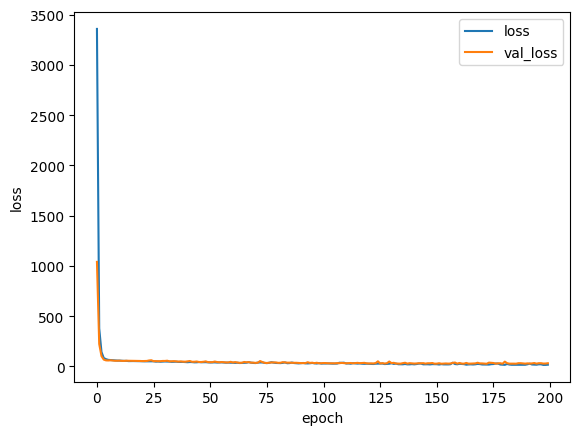

In [ ]:
#Vamos a verlo en grafico
plt.plot(hist3.history['loss'], label="loss")
plt.plot(hist3.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

***El mejor modelo segun las capas que hemos asignado y las neuronas nos lo da el Modelo 3.***

***Cuanto mas cerca estamos a 0 mejor es nuestro modelo. Además es el que menos tiempo ha tardado en entrenarse.***

Además guarda el mejor modelo en formato *.h5* usando la función `save`:

In [ ]:
# Completar Guardado
model3.save('Precio_vivienda.h5')

## <font color="#004D7F" size=4>Ejercicio 6 (Opcional)</font>
Carga el mejor modelo que has guardado en el ejercicio anterior usando la función `load_model` y realizar predicciones usando la función `predict`.

Para realizar las predicciones usa 10 datos cualquier del conjunto de test:

In [ ]:
# Completar Predicciones
#cargamos el modelo que hemos guardado
mejorModelo = tf.keras.models.load_model('Precio_vivienda.h5')

In [ ]:
mejorModelo.layers

In [ ]:
#Usamos la función predict
mejorModelo.predict(x_test[[2,8,14,26,33,42,58,76,90,101],:])


1/1 [==============================] - 0s 90ms/step


array([[24.287195],
       [21.237614],
       [17.47972 ],
       [31.5489  ],
       [23.802912],
       [17.254728],
       [40.43093 ],
       [24.241121],
       [20.90188 ],
       [24.968996]], dtype=float32)

***Vamos a comprobar si las predicciones son correctas.***

In [ ]:
y_test[8]

20.5

***Vemos que no mucho, porque tenemos el error a 30.***